# Выбор локации для скважины

Нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Требуется построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Описание данных

<ul>
<li>id — уникальный идентификатор скважины</li>
<li>f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы)</li>
<li>product — объём запасов в скважине (тыс. баррелей)</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats as st

## Загрузка и подготовка данных

### Загрузка данных

In [2]:
def open_file(file):
    return pd.read_csv(file)

In [3]:
def data_info(data):
    return data.info()

In [4]:
def data_describe(data):
    return data.describe()

In [5]:
def correlation(data):
    display(data.corr())
    data.plot(x = 'product', y = 'f0', grid = True, kind = 'scatter')
    plt.title('Влияние f0 на объем запасов в скважине')
    data.plot(x = 'product', y = 'f1', grid = True, kind = 'scatter')
    plt.title('Влияние f1 на объем запасов в скважине')
    data.plot(x = 'product', y = 'f2', grid = True, kind = 'scatter')
    plt.title('Влияние f2 на объем запасов в скважине')

#### Первый регион

In [6]:
geo_data_0 = open_file('geo_data_0.csv')
geo_data_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [7]:
data_info(geo_data_0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


В данных нет пропусков

In [8]:
data_describe(geo_data_0)

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


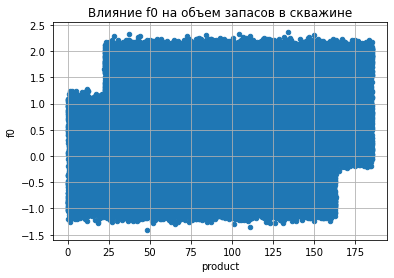

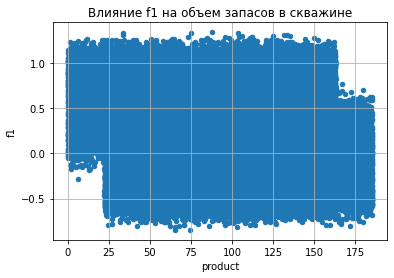

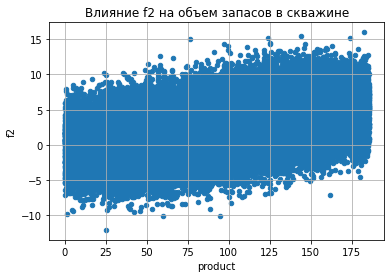

In [9]:
correlation(geo_data_0)

Для данного региона не требуется подготовки данных, так как отсутствуют пропуски, столбцы названы правильно и типы данных в столбцах также верны. На данный регион в большей степени влияет признак f2. Корреляция объема запасов в скважине и данным признаком равна 0.483663.

#### Второй регион

In [10]:
geo_data_1 = open_file('geo_data_1.csv')
geo_data_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [11]:
data_info(geo_data_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
data_describe(geo_data_1)

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


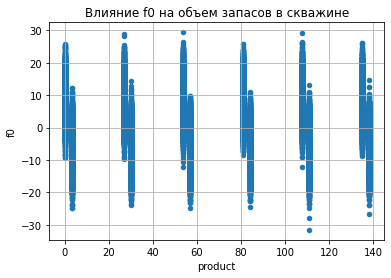

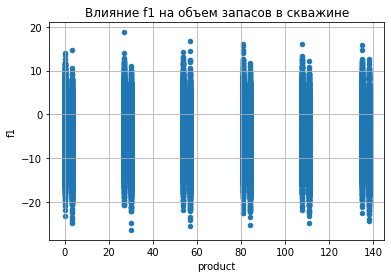

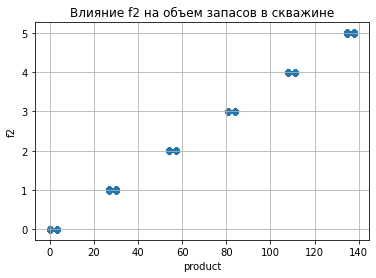

In [13]:
correlation(geo_data_1)

Аналогично пропуски в данных отсутствуют и данные имеют нужный тип. Объемов запасов в скважине напрямую зависит от признака f2. Корреляция равна 0.999397.

#### Третий регион

In [14]:
geo_data_2 = open_file('geo_data_2.csv')
geo_data_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [15]:
data_info(geo_data_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [16]:
data_describe(geo_data_2)

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


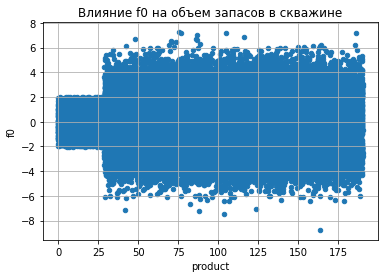

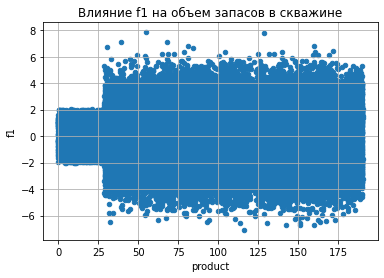

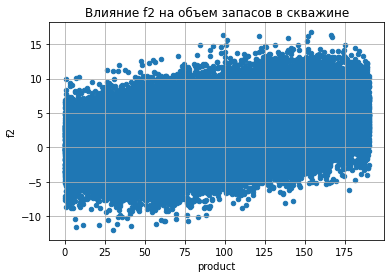

In [17]:
correlation(geo_data_2)

Объемов запасов в скважине в третьем регионе также зависит от признака f2. Корреляция равна 0.445871. Два других признака почти не влияют на объем сырья.

<b>Вывод:</b> все данные полные, отсутствуют пропуски, все столбцы имеют верный тип, столбцы названы правильно. Предобработка данных не требуется. Столбец product - целевой признак. Целевой признак количественный, поэтому будем решать задачу регрессии. Объем сырья в скважине во всех 3 регионах в большей степени зависит от признака f2.

## Обучение и проверка модели

In [18]:
def train_valid_data(data):
    features = data.drop(['id', 'product'], axis = 1)
    target = data['product']

    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.25, random_state = 12345)
    print('Размер всех данных:', geo_data_0.shape)
    print('Размер обучающей выборки (без целевого признака):', features_train.shape)
    print('Размер валидационной выборки (без целевого признака):', features_valid.shape)
    return features_train, features_valid, target_train, target_valid

<b>Разбиение для первого региона</b>

In [19]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_valid_data(geo_data_0)

Размер всех данных: (100000, 5)
Размер обучающей выборки (без целевого признака): (75000, 3)
Размер валидационной выборки (без целевого признака): (25000, 3)


<b>Разбиение для второго региона</b>

In [20]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_valid_data(geo_data_1)

Размер всех данных: (100000, 5)
Размер обучающей выборки (без целевого признака): (75000, 3)
Размер валидационной выборки (без целевого признака): (25000, 3)


<b>Разбиение для третьего региона</b>

In [21]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_valid_data(geo_data_2)

Размер всех данных: (100000, 5)
Размер обучающей выборки (без целевого признака): (75000, 3)
Размер валидационной выборки (без целевого признака): (25000, 3)


### Обучение модели

В условии задачи сказано, что для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые)

In [22]:
def linear_model(features_train, target_train, features_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    return model, predictions_valid

<b>Модель для первого региона</b>

In [23]:
model_0, predictions_valid_0 = linear_model(features_train_0, target_train_0, features_valid_0)

<b>Модель для второго региона</b>

In [24]:
model_1, predictions_valid_1 = linear_model(features_train_1, target_train_1, features_valid_1)

<b>Модель для третьего региона</b>

In [25]:
model_2, predictions_valid_2 = linear_model(features_train_2, target_train_2, features_valid_2)

### Средний запас предсказанного сырья и RMSE модели

In [26]:
def predictions_valid_mean(predictions_valid):
    return predictions_valid.mean()

In [27]:
def RMSE(target_valid, predictions_valid):
    mse = mean_squared_error(target_valid, predictions_valid)
    rmse = mse**0.5
    print('RMSE:',rmse)

<b>Для первого региона</b>

In [28]:
predictions_valid_mean_0 = predictions_valid_mean(predictions_valid_0)
print('Средний запас предсказанного сырья для первого региона равен', predictions_valid_mean_0)
RMSE(target_valid_0, predictions_valid_0)

Средний запас предсказанного сырья для первого региона равен 92.59256778438038
RMSE: 37.5794217150813


<b>Для второго региона</b>

In [29]:
predictions_valid_mean_1 = predictions_valid_mean(predictions_valid_1)
print('Средний запас предсказанного сырья для второго региона равен', predictions_valid_mean_1)
RMSE(target_valid_1, predictions_valid_1)

Средний запас предсказанного сырья для второго региона равен 68.72854689544602
RMSE: 0.893099286775616


<b>Для третьего региона</b>

In [30]:
predictions_valid_mean_2 = predictions_valid_mean(predictions_valid_2)
print('Средний запас предсказанного сырья для третьего региона равен', predictions_valid_mean_2)
RMSE(target_valid_2, predictions_valid_2)

Средний запас предсказанного сырья для третьего региона равен 94.96504596800489
RMSE: 40.02970873393434


Корень из средней квадратичной ошибки получился достаточно большой для первого и третьего регионов, средний запасы в этих реонах получились примерно одинаковый. Средний запас во втором регионе получился меньше, но корень из средней квадратичной ошибки значительно отличается

## Подготовка к расчёту прибыли

### Достаточный объём сырья для безубыточной разработки новой скважины

Бюджет на разработку скважин в регионе — 10 млрд рублей. 200 точек для разработки. При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [31]:
BUDGET = 1*(10**10)
NUM_OF_WELLS = 200
PROFIT_PER_UNIT = 450000
enough_row_materials = BUDGET / (NUM_OF_WELLS * PROFIT_PER_UNIT)
print('Достаточный объем сырья для безубыточной разработки новой скважины равен', enough_row_materials)

Достаточный объем сырья для безубыточной разработки новой скважины равен 111.11111111111111


In [32]:
print('Средний запас сырья для первого региона:', predictions_valid_mean_0)
print('Средний запас сырья для второго региона:', predictions_valid_mean_1)
print('Средний запас сырья для третьего региона:', predictions_valid_mean_2)

Средний запас сырья для первого региона: 92.59256778438038
Средний запас сырья для второго региона: 68.72854689544602
Средний запас сырья для третьего региона: 94.96504596800489


<b>Вывод:</b> средние запасы для каждого региона меньше, во втором регионе средние запасы меньше почти в 2 раза по сравнению с достаточным объемом сырья для безубыточной разработки новой скважины.

## Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

Для того, чтобы найти прибыль по выбранным скважинам и предсказания модели следует выполнить следующие шаги:
1. Выбрать скважины с максимальными значениями предсказаний
2. Просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям
3. Рассчитать прибыль для полученного объёма сырья

In [33]:
def top_200_profit(target_valid, predictions_valid):
    predictions_valid = pd.Series(predictions_valid).reset_index(drop=True)
    target_valid = pd.Series(target_valid).reset_index(drop=True)
    top_200_product = pd.Series(predictions_valid).sort_values(ascending = False).head(200)
    top_200_product_sum = target_valid[top_200_product.index].sum()
    return top_200_product_sum * PROFIT_PER_UNIT - BUDGET

In [34]:
print('Прибыль по выбранным скважинам для первого региона', top_200_profit(target_valid_0, predictions_valid_0))

Прибыль по выбранным скважинам для первого региона 3320826043.1398525


In [35]:
print('Прибыль по выбранным скважинам для второго региона', top_200_profit(target_valid_1, predictions_valid_1))

Прибыль по выбранным скважинам для второго региона 2415086696.681511


In [36]:
print('Прибыль по выбранным скважинам для третьего региона', top_200_profit(target_valid_2, predictions_valid_2))

Прибыль по выбранным скважинам для третьего региона 2710349963.5998325


<b>Вывод:</b> большую прибыль дало предсказание модели по первому региону

## Расчёт прибыли и рисков 

In [37]:
state = np.random.RandomState(12345)

In [38]:
def bootstrap(target_valid, predictions_valid):
    target_valid = target_valid.reset_index(drop=True)
    values = []
    for i in range(1000):
        target_subsample = target_valid.sample(500, replace = True, random_state = state)
        predictions_subsample = predictions_valid[target_subsample.index]
        profit_ = top_200_profit(target_subsample, predictions_subsample)
        values.append(profit_)
    return pd.Series(values)

### Седняя прибыль, 95%-й доверительный интервал и риск убытков

In [39]:
def analysis(target_valid, predictions_valid):
    average_profit = bootstrap(target_valid, predictions_valid)
    mean = average_profit.mean()
    lower = average_profit.quantile(0.025)
    upper = average_profit.quantile(0.975)
    
    print('Средняя прибыль:', mean)
    print('95%-й доверительный интервал:({:.5f}, {:.5f})'.format(lower, upper))
    print('Риск убытков: {:.2%}'.format((average_profit<0).mean()))

In [40]:
analysis(target_valid_0, predictions_valid_0)

Средняя прибыль: 396164984.8023709
95%-й доверительный интервал:(-111215545.89050, 909766941.55342)
Риск убытков: 6.90%


In [41]:
analysis(target_valid_1, predictions_valid_1)

Средняя прибыль: 461155817.27723986
95%-й доверительный интервал:(78050810.75174, 862952060.26372)
Риск убытков: 0.70%


In [42]:
analysis(target_valid_2, predictions_valid_2)

Средняя прибыль: 392950475.1706037
95%-й доверительный интервал:(-112227625.37858, 934562914.55116)
Риск убытков: 6.50%


<b>Вывод:</b> единственный регион, в котором риски меньше 2.5%(заданных по условию задачи), это 2 регион. Данный регион дает наименьшую прибыль по выбранным моделью скважинам, но по итогу именно в данном регионе мы получим наибольшую средню прибыль в 461 млн.руб